# Project 2: Regression - Predicting House Prices

## Dataset: 

House Prices: Advanced Regression Techniques (available from Kaggle)

## Analysis Goals:

1. Data Preprocessing:
    - Handle missing values using appropriate techniques.
    - Encode categorical variables using techniques like one-hot encoding.
    - Scale numerical features using StandardScaler or MinMaxScaler.
2. Feature Selection:
    - Identify important features using techniques like correlation analysis or feature importance scores from models like Random Forest.
3. Model Building:
    - Algorithms
        - Linear Regression
        - Ridge Regression
        - Lasso Regression
        - Elastic Net
        - RANSAC
        - Polynomial Regression
        - Random Forest Regression
        - Gradient Boosting Regression.
    - Train/Test Split: 80/20 split or using techniques like cross-validation for model validation.
    - Model evaluation:
        - Mean squared error
        - Mean absolute error
        - R-squared.
4. Hyperparameter Tuning:
    - Use techniques like GridSearchCV or RandomizedSearchCV to find optimal hyperparameters for each regression model.
    - Perform cross-validation with k-fold to ensure robustness of parameter selection.
5. Model Evaluation:
    - Visualize model performance using scatter plots of actual vs. predicted house prices.
    - Compare models based on evaluation metrics and select the best-performing one.

## Analysis

### Load Data

| Variable Name | Description                                           |
|---------------|-------------------------------------------------------|
| SalePrice     | The property's sale price in dollars. This is the target variable that you're trying to predict. |
| MSSubClass    | The building class                                   |
| MSZoning      | The general zoning classification                     |
| LotFrontage   | Linear feet of street connected to property          |
| LotArea       | Lot size in square feet                              |
| Street        | Type of road access                                  |
| Alley         | Type of alley access                                 |
| LotShape      | General shape of property                            |
| LandContour   | Flatness of the property                             |
| Utilities     | Type of utilities available                          |
| LotConfig     | Lot configuration                                    |
| LandSlope     | Slope of property                                    |
| Neighborhood  | Physical locations within Ames city limits            |
| Condition1    | Proximity to main road or railroad                   |
| Condition2    | Proximity to main road or railroad (if a second is present) |
| BldgType      | Type of dwelling                                     |
| HouseStyle    | Style of dwelling                                    |
| OverallQual   | Overall material and finish quality                   |
| OverallCond   | Overall condition rating                             |
| YearBuilt     | Original construction date                           |
| YearRemodAdd  | Remodel date                                         |
| RoofStyle     | Type of roof                                         |
| RoofMatl      | Roof material                                        |
| Exterior1st   | Exterior covering on house                           |
| Exterior2nd   | Exterior covering on house (if more than one material) |
| MasVnrType    | Masonry veneer type                                  |
| MasVnrArea    | Masonry veneer area in square feet                   |
| ExterQual     | Exterior material quality                            |
| ExterCond     | Present condition of the material on the exterior    |
| Foundation    | Type of foundation                                   |
| BsmtQual      | Height of the basement                               |
| BsmtCond      | General condition of the basement                    |
| BsmtExposure  | Walkout or garden level basement walls               |
| BsmtFinType1  | Quality of basement finished area                    |
| BsmtFinSF1    | Type 1 finished square feet                          |
| BsmtFinType2  | Quality of second finished area (if present)         |
| BsmtFinSF2    | Type 2 finished square feet                          |
| BsmtUnfSF     | Unfinished square feet of basement area              |
| TotalBsmtSF   | Total square feet of basement area                   |
| Heating       | Type of heating                                      |
| HeatingQC     | Heating quality and condition                        |
| CentralAir    | Central air conditioning                             |
| Electrical    | Electrical system                                    |
| 1stFlrSF      | First Floor square feet                              |
| 2ndFlrSF      | Second floor square feet                             |
| LowQualFinSF  | Low quality finished square feet (all floors)        |
| GrLivArea     | Above grade (ground) living area square feet         |
| BsmtFullBath  | Basement full bathrooms                              |
| BsmtHalfBath  | Basement half bathrooms                              |
| FullBath      | Full bathrooms above grade                           |
| HalfBath      | Half baths above grade                               |
| Bedroom       | Number of bedrooms above basement level              |
| Kitchen       | Number of kitchens                                   |
| KitchenQual   | Kitchen quality                                      |
| TotRmsAbvGrd  | Total rooms above grade (does not include bathrooms) |
| Functional    | Home functionality rating                            |
| Fireplaces    | Number of fireplaces                                 |
| FireplaceQu   | Fireplace quality                                    |
| GarageType    | Garage location                                      |
| GarageYrBlt   | Year garage was built                                |
| GarageFinish  | Interior finish of the garage                        |
| GarageCars    | Size of garage in car capacity                       |
| GarageArea    | Size of garage in square feet                        |
| GarageQual    | Garage quality                                       |
| GarageCond    | Garage condition                                     |
| PavedDrive    | Paved driveway                                       |
| WoodDeckSF    | Wood deck area in square feet                        |
| OpenPorchSF   | Open porch area in square feet                       |
| EnclosedPorch | Enclosed porch area in square feet                   |
| 3SsnPorch     | Three season porch area in square feet               |
| ScreenPorch   | Screen porch area in square feet                     |
| PoolArea      | Pool area in square feet                             |
| PoolQC        | Pool quality                                         |
| Fence         | Fence quality                                        |
| MiscFeature   | Miscellaneous feature not covered in other categories|
| MiscVal       | $Value of miscellaneous feature                      |
| MoSold        | Month Sold                                           |
| YrSold        | Year Sold                                            |
| SaleType      | Type of sale                                         |
| SaleCondition | Condition of sale                                    |


In [1]:
import pandas as pd

df = pd.read_csv('data/AmesHousing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [2]:
y = df['SalePrice']
X = df.drop(columns=('SalePrice'))

X.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


### SelectKBest for Feature Selection

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression, chi2, f_classif, mutual_info_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RANSACRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer

# List of numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# List of categorical features
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing pipelines for numerical and categorical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer()),  # Impute missing values
    ('scaler', StandardScaler()),  # Scale numerical features
    ('selector', SelectKBest())  # Feature selection (score_func will be specified in grid search)
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features)
])

# Define a dictionary of regression models
regressors = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(max_iter=10000),
    'Elastic Net': ElasticNet(),
    'RANSAC': RANSACRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'Polynomial Regression': Pipeline([
        ('poly', PolynomialFeatures()),  # Add polynomial features
        ('regressor', LinearRegression())  # Linear regression on polynomial features
    ])
}

# Create a pipeline with preprocessing and regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Placeholder, will be replaced during grid search
])

# Define hyperparameters grid for grid search
param_grid = {
    'preprocessor__numeric__selector__k': [5, 10, 15],  # Number of features to select
    'preprocessor__numeric__selector__score_func': [f_regression, mutual_info_regression, chi2, f_classif, mutual_info_classif],  # Score function for feature selection
    'regressor': list(regressors.values()),  # Regression models to try
    #'regressor__polynomialfeatures__degree': [2, 3],  # Polynomial regression degree
    # Add more hyperparameters for tuning if needed
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding R-squared score
print("Best Parameters:", grid_search.best_params_)
print("Best R-squared Score:", grid_search.best_score_)

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.8/site-packages/sklearn/pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.8/site-packages/

Best Parameters: {'preprocessor__numeric__selector__k': 15, 'preprocessor__numeric__selector__score_func': <function mutual_info_regression at 0x120e8ea60>, 'regressor': GradientBoostingRegressor()}
Best R-squared Score: 0.9025258427090168


In [21]:
# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test R-squared Score:", test_score)

Test R-squared Score: 0.9056664489919011


In [22]:
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(actual, predicted, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(actual, predicted, alpha=0.5)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'Actual vs. Predicted House Prices ({model_name})')
    plt.grid(True)
    plt.show()

def plot_actual_vs_predicted_with_line(actual, predicted, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(actual, predicted, alpha=0.5)
    plt.plot(actual, actual, color='red', linestyle='--')  # Plot y = x line
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'Actual vs. Predicted House Prices ({model_name})')

    # Calculate R-squared value
    r_squared = r2_score(actual, predicted)
    r_squared_str = f'R-squared: {r_squared:.4f}'

    # Add R-squared value to the plot
    plt.text(plt.xlim()[0], plt.ylim()[1], r_squared_str, ha='left', va='top', fontsize=12, color='blue')

    plt.grid(True)
    plt.show()

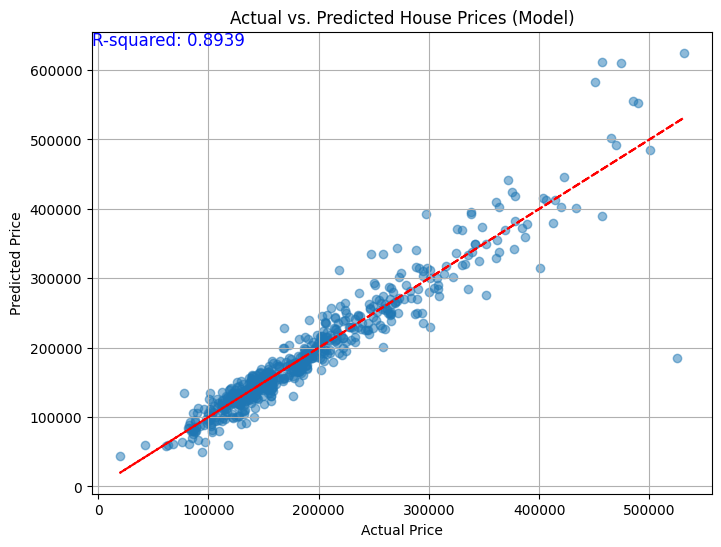

In [23]:
# Fit the best estimator on the entire training data
best_model.fit(X_train, y_train)

# Use the fitted model to make predictions
predictions = best_model.predict(X_test)

#plot_actual_vs_predicted(predictions, y_test, 'Model')
plot_actual_vs_predicted_with_line(predictions, y_test, 'Model')

### Correlation Matrix for Feature Selection

Lets try just doing a correlation matrix to perform feature selection than test which regression models perform the best.

In [39]:
df = pd.read_csv('data/AmesHousing.csv')
y = df['SalePrice']
X = df.drop(columns=('SalePrice'))

In [40]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# List of numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# List of categorical features
categorical_features = X.select_dtypes(include=['object']).columns

# Pipeline for numerical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Using median for numerical features
    ('scaler', StandardScaler())
])

# Pipeline for categorical features
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Using most frequent for categorical features
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both pipelines
preprocessing_pipeline = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features)
])

# Preprocess the data
X_preprocessed = preprocessing_pipeline.fit_transform(X)

# Get the one-hot encoded feature names
encoded_categories = preprocessing_pipeline.named_transformers_['categorical']\
                                         .named_steps['encoder']\
                                         .get_feature_names_out(input_features=categorical_features)


# Combine numerical and categorical feature names
all_feature_names = np.concatenate([numerical_features, encoded_categories])


# Convert sparse matrix to dense array
X_preprocessed_dense = X_preprocessed.toarray()

# Convert dense array to DataFrame with feature names
X_preprocessed_df = pd.DataFrame(X_preprocessed_dense, columns=all_feature_names)



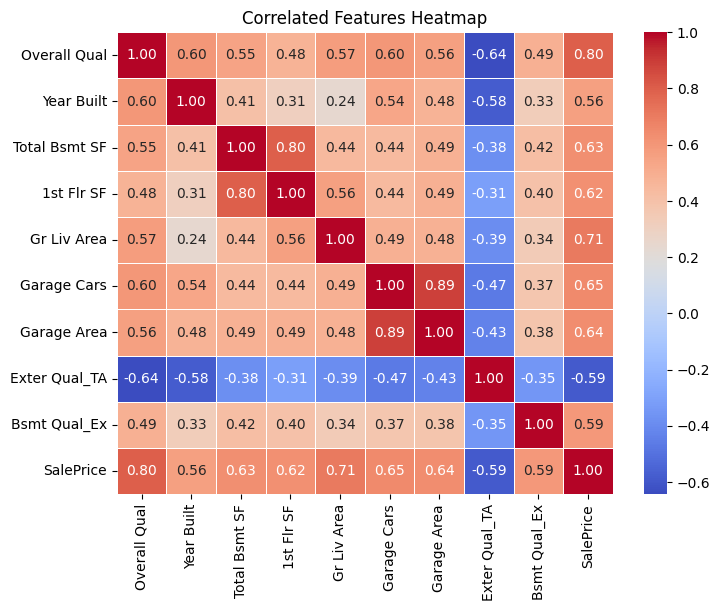

Selected features based on correlation with target variable:
['Year Built', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Exter Qual_TA', 'Bsmt Qual_Ex', 'SalePrice']


In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Combine X_preprocessed_df with the target variable y
data = pd.concat([X_preprocessed_df, y], axis=1)

# Calculate the correlation matrix
correlation_matrix = data.corr()

## Plot heatmap of correlation matrix
#plt.figure(figsize=(12, 10))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
#plt.title('Correlation Heatmap')
#plt.show()

# Select features with correlation above a threshold (e.g., 0.5) with the target variable
target_correlation = abs(correlation_matrix['SalePrice'])
relevant_features = target_correlation[target_correlation > 0.55].index.tolist()

# Plot heatmap of correlated features
plt.figure(figsize=(8, 6))
sns.heatmap(data[relevant_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlated Features Heatmap')
plt.show()

# Select relevant features for further analysis
selected_features = relevant_features[1:]  # Exclude the target variable
print("Selected features based on correlation with target variable:")
print(selected_features)




In [130]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define threshold values
threshold = np.arange(0.2, 0.71, 0.1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_df, y, test_size=0.2)

# Initialize Linear Regression model
lr = LinearRegression()
ridge = Ridge()


regression_models = {
    'Linear Regression':LinearRegression(),
    'Ridge Regression':Ridge(),
    'Lasso Regression':Lasso(),
    'Elastic Net': ElasticNet(),
    'RANSAC': RANSACRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
}
# Iterate over threshold values
for thres in threshold:
    # Select features based on correlation threshold
    features = target_correlation[target_correlation > thres].index.tolist()
    print(f'\n\nThreshold: {thres:.2f}')
    for name, model in regression_models.items():
        # Fit model on training data
        model.fit(X_train[features[:-1]], y_train)

        # Make predictions on test data
        y_pred = model.predict(X_test[features[:-1]])
    
        # Calculate R-squared, MSE, and MAE
        r_squared = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        # Print threshold and R-squared value, MSE and MAE

        print(f"{name:30s}- R-squared: {r_squared:.2f}  -  MSE: {mse:.2f}  -  MAE: {mae:.2f}")




Threshold: 0.20
Linear Regression             - R-squared: 0.88  -  MSE: 699905852.99  -  MAE: 18228.37
Ridge Regression              - R-squared: 0.88  -  MSE: 691873502.26  -  MAE: 18148.85
Lasso Regression              - R-squared: 0.88  -  MSE: 696694084.96  -  MAE: 18205.21
Elastic Net                   - R-squared: 0.85  -  MSE: 871054194.73  -  MAE: 19617.28
RANSAC                        - R-squared: 0.84  -  MSE: 955085368.13  -  MAE: 20753.11
Random Forest Regression      - R-squared: 0.90  -  MSE: 574772529.96  -  MAE: 15564.87
Gradient Boosting Regression  - R-squared: 0.91  -  MSE: 517405121.78  -  MAE: 15051.76


Threshold: 0.30
Linear Regression             - R-squared: 0.88  -  MSE: 710515729.99  -  MAE: 18637.86
Ridge Regression              - R-squared: 0.88  -  MSE: 709724024.72  -  MAE: 18636.17
Lasso Regression              - R-squared: 0.88  -  MSE: 710295832.29  -  MAE: 18636.43
Elastic Net                   - R-squared: 0.84  -  MSE: 937930356.39  -  MAE: 20255

### PCA for Feature Selection

In [ ]:
from sklearn.decomposition import PCA
# Define a range of number of components to try for PCA
n_components_range = [5, 10, 15, 20, 25]

# Perform cross-validation for each number of components and each regression model
for n_components in n_components_range:
    # Create PCA object
    pca = PCA(n_components=n_components)
    print(f"\n\nNumber of components: {n_components}")
    # Transform the preprocessed data using PCA
    X_pca = pca.fit_transform(X_preprocessed_df)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
    
    # Iterate over regression models
    for model_name, model in regression_models.items():
        # Fit model on training data
        model.fit(X_train, y_train)
        
        # Make predictions on test data
        y_pred = model.predict(X_test)
        
        # Calculate evaluation metrics
        r_squared = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print results
        print(f"{model_name:30s}- R-squared: {r_squared:.2f}  -  MSE: {mse:.2f}  -  MAE: {mae:.2f}")

### Conclusions

- For this dataset the more features we include the better the model does. Also reducing feature does not significantly alter training time on this amount of data.
- I tried 3 different types of feature selection:
    - SelectKBest
    - Correlation Matrix
    - PCA
- All of them performed similarly
- For this data set gradient boosting regression outperformed the other models tested although Random Forest Regression was almost equally accurate
- Could look into removing outliers to see if we can get a better fit but an $R^{2}$ of 0.9 is not bad so it may not be worth it here
- Could also do some hyperparameter tuning with certian regression models such as Lasso and Ridge 